# Prototipo 4

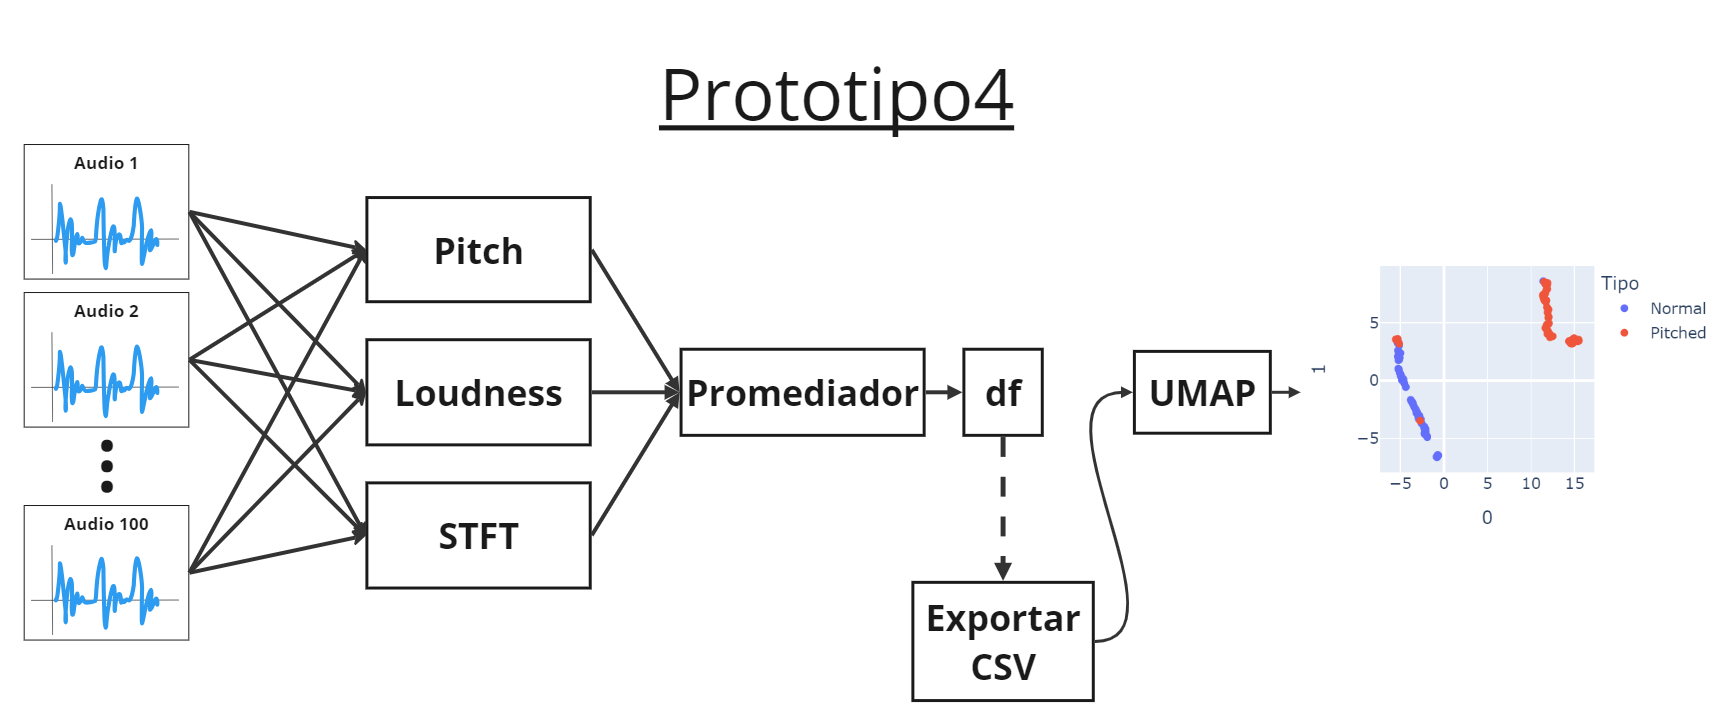

# Parametros Acusticos

## Funcion Pitch

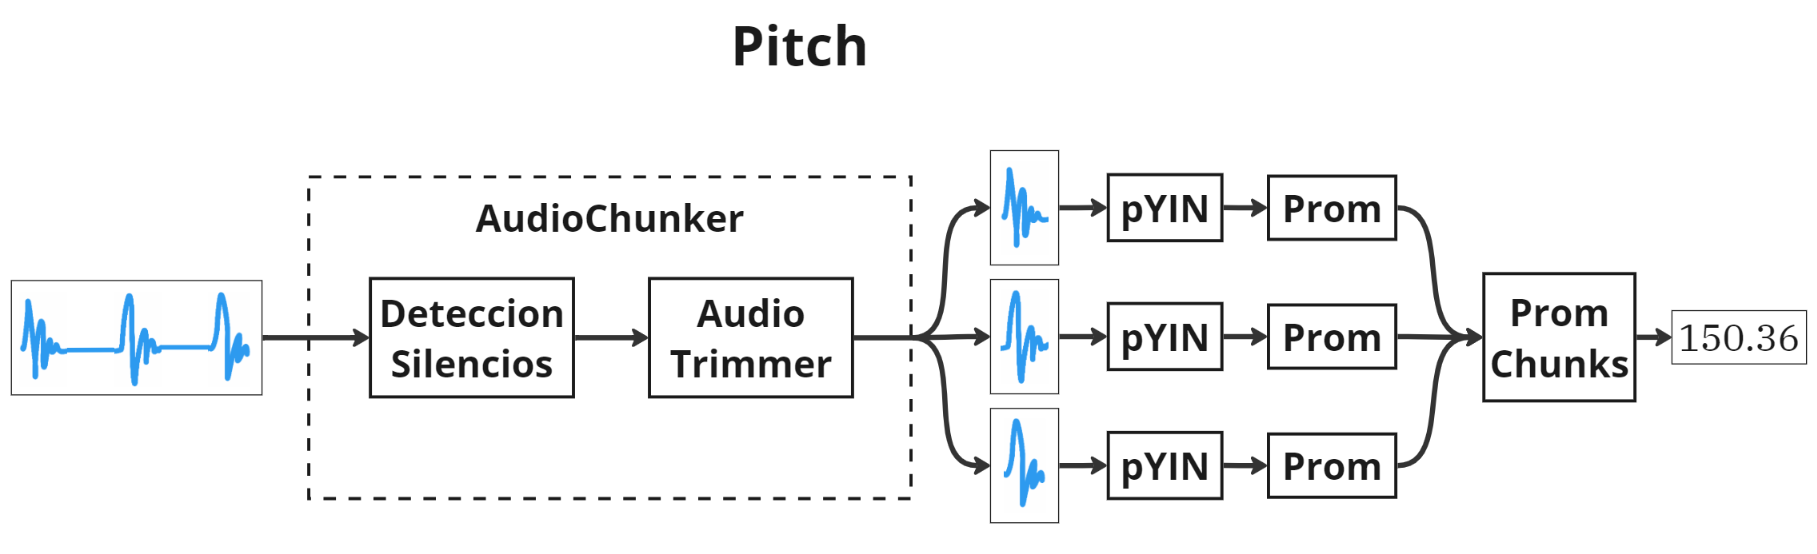

### AudioChunker

In [1]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

def DeteccionSilencios(path,st_win,st_step,weight,smooth_window,plot):
    [Fs, x] = aIO.read_audio_file(path)
    segments = aS.silence_removal(
        x, 
        Fs, 
        st_win,
        st_step,
        smooth_window,
        weight,
        plot
    )
    return segments

from pydub import AudioSegment

def AudioTrimmer(path,segments,nombre):
    i=1
    for seg in segments:
        audio = AudioSegment.from_mp3(path)
        start = seg[0] * 1000
        end =  seg[1] * 1000
        audio = audio[:end]
        audio = audio[start:]
        audio.export(f"{nombre}_chunk{i}.wav", format="wav")
        i+=1

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


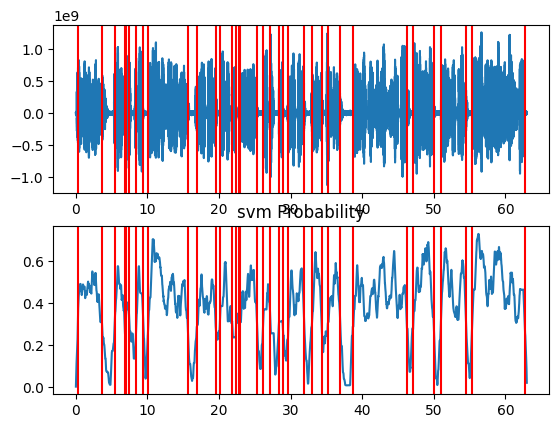

In [16]:
path_directorio = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo4/LosSentidosAudios'
num=2
nombres_archivos = [f'LosSentidos{i+num}Reaper' for i in range(1)]
for nombre in nombres_archivos:
    path = f'{path_directorio}/{nombre}.wav'
    nombre = nombre + str('2')
    st_win=0.01
    st_step=0.01
    smooth_window = 0.4
    weight = 1
    plot = True
    segments=DeteccionSilencios(
        path,
        st_win,
        st_step,
        smooth_window,
        weight,
        plot)
    # AudioTrimmer(path,segments,nombre)

Franquito me lo pasó por Whatsapp eso hace que el archivo este en .opus, para eso lo paso a wav con este proceso
- ffmpeg -i C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo4/LosSentidosAudios/LosSentidos2.opus C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo4/LosSentidosAudios/LosSentidos2.wav

## Funcion Loudness

## Funcion STFT

51
21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
51


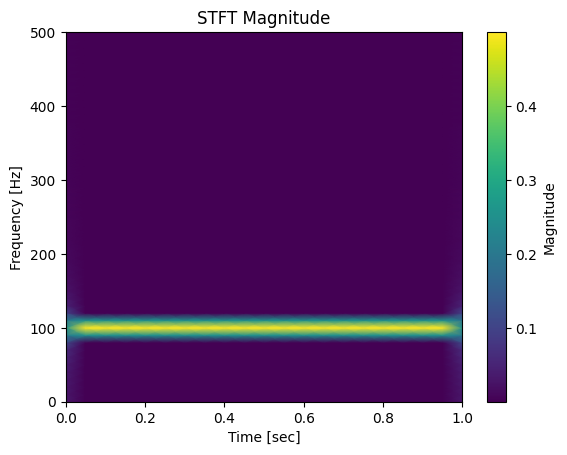

: 

In [53]:
import numpy as np
from scipy.signal import stft
import matplotlib.pyplot as plt

# Generate a test signal (sine wave)
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time array
f = 100  # Frequency of the sine wave
x = np.sin(2 * np.pi * f * t)  # Test signal

# Compute STFT
frequencies, times, Zxx = stft(x, fs,nperseg=100)

print(len(frequencies))
print(len(times))
print(times)
print(len(Zxx))

# Plot the spectrogram
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('STFT Magnitude')
plt.colorbar(label='Magnitude')
plt.show()

# Cargar df

# Clustering